In [1]:
print(f"Варіант {(27 + 4) % 5 + 1}")

Варіант 2


#### Варіант 2
Завдання: 3, 4, 5, 8, 9, 11, 12, 13, 14, 16, 17, 18, 
19, 20, 22, 23, 24, 27

3. Отримайте імена стовпців набору даних.
4. Отримайте загальну інформацію про дані у наборі даних.
5. Знайдіть кількість унікальних імен у наборі даних.
8. Знайдіть найпопулярніше ім’я за результатами одного року (ім’я, для якого 
Count максимальне.
9. Підрахуйте кількість записів, для яких Count - мінімальне у наборі.
11. Знайдіть рік із найбільшою кількістю унікальних імен.
12. Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних 
імен (тобто у 2008 році.
13. Знайдіть рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих 
іме.
14. Знайти рік із найбільшою кількістю гендерно нейтральних імен (однакові 
чоловічі та жіночі імена.
16. Знайдіть рік, коли народилося найбільше дітей.
17. Знайдіть кількість дівчаток та хлопчиків, які народились кожного року.
18. Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж 
хлопчиків
19. Накресліть графік загальної кількості народжень хлопчиків та дівчаток на 
рік
20. Підрахуйте кількість гендерно нейтральних імен (однакових для дівчат та 
хлопців.
22. Підрахуйте скільки років проводилось спостереження.
23. Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні 
кожного року.
24. Знайти найпопулярніше серед непопулярних імен.
27. Знайти найпопулярніші імена в кожному році.

### Виконання роботи

### 3. Отримайте імена стовпців набору даних.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

df = pd.read_csv("./NationalNames.csv")
df.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

### 4. Отримайте загальну інформацію про дані у наборі даних.

In [6]:
df.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


### 5. Знайдіть кількість унікальних імен у наборі даних.

In [7]:
df['Name'].nunique()

93889

### 8. Знайдіть найпопулярніше ім’я за результатами одного року (ім’я, для якого Count максимальне).

In [44]:
def find_most_popular_name_in_year(y):
    data_for_year = df[df['Year'] == y]
    most_popular_name_for_year = data_for_year[data_for_year['Count'] == data_for_year['Count'].max()]['Name'].values[0]
    print(f"The name is '{most_popular_name_for_year}' in {y}")
find_most_popular_name_in_year(1947)    

The name is 'Linda' in 1947


### 9. Підрахуйте кількість записів, для яких Count - мінімальне у наборі.

In [17]:
df[df['Count'] == df['Count'].min()].shape[0]

254615

### 11. Знайдіть рік із найбільшою кількістю унікальних імен.

In [43]:
u_name_count_frame = df.groupby('Year')['Name'].nunique()
print(f"Year {u_name_count_frame.idxmax()}; Unique names: {u_name_count_frame.max()}")

Year 2008; Unique names: 32488


### 12. Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (тобто у 2008 році).

In [45]:
find_most_popular_name_in_year(2008)

The name is 'Jacob' in 2008


### 13. Знайдіть рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих імен.

In [55]:
all_jacob_name_rows = df[(df['Gender'] == 'F') & (df['Name'] == 'Jacob')]
all_jacob_name_rows[all_jacob_name_rows['Count'] == all_jacob_name_rows['Count'].max()]


,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


### 14. Знайти рік із найбільшою кількістю гендерно нейтральних імен (однакові чоловічі та жіночі імена).

In [66]:
gender_counts = df.groupby(['Year', 'Name'])['Gender'].nunique()
gender_neutral_names = gender_counts[gender_counts == 2]
names_per_year = gender_neutral_names.groupby('Year').count()
names_per_year[names_per_year == names_per_year.max()]

Year
2008    2557
Name: Gender, dtype: int64

### 16. Знайдіть рік, коли народилося найбільше дітей.

In [70]:
df.groupby(['Year'])['Count'].sum().idxmax()

1957

### 17. Знайдіть кількість дівчаток та хлопчиків, які народились кожного року.

In [74]:
fm_annual_birth_df = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
fm_annual_birth_df

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414


### 18. Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків.

In [76]:
(fm_annual_birth_df['F'] > fm_annual_birth_df['M']).sum()

54

### 19. Накресліть графік загальної кількості народжень хлопчиків та дівчаток на рік.

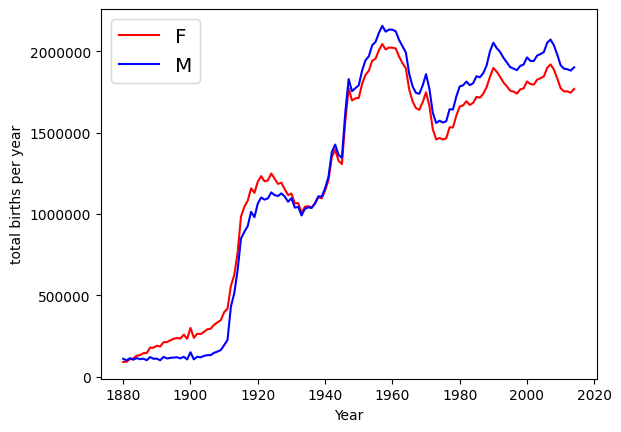

In [98]:
plot.plot(fm_annual_birth_df.index, fm_annual_birth_df['F'], color='red', label='F')
plot.plot(fm_annual_birth_df.index, fm_annual_birth_df['M'], color='blue', label='M')
plot.xlabel("Year")
plot.ylabel("total births per year")
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plot.legend(fontsize="x-large")
plot.show()

### 20. Підрахуйте кількість гендерно нейтральних імен (однакових для дівчат та хлопців).

In [6]:
all_gender_neutral_names = df.groupby(['Name'])['Gender'].nunique()
all_gender_neutral_names = all_gender_neutral_names[all_gender_neutral_names == 2]
all_gender_neutral_names.count()

10221

### 22. Підрахуйте скільки років проводилось спостереження.

In [107]:
print(f"Спостереження проводились {df['Year'].nunique()} років")

Спостереження проводились 135 років


### 23. Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року).

In [124]:
gn_names_count = gender_neutral_names.groupby(['Name']).count()
gn_names_count[gn_names_count == df['Year'].nunique()].reset_index().drop(columns='Gender')

,Name
0,Francis
1,James
2,Jean
3,Jesse
4,Jessie
5,John
6,Johnnie
7,Joseph
8,Lee
9,Leslie


### 24. Знайти найпопулярніше серед непопулярних імен.

In [157]:
names_grouped_by_year = df.groupby(['Year', 'Name'])['Count'].sum()
names_popularity = names_grouped_by_year.groupby('Name').agg(['count', 'sum'])
most_unpopular_names = names_popularity[names_popularity['count'] == 1]
most_unpopular_names_sorted = most_unpopular_names.sort_values(by=('sum'), ascending=False)
most_unpopular_names_sorted.head(1)

,count,sum
Name,,
Christop,1,1082


### 27. Знайти найпопулярніші імена в кожному році.

In [153]:
most_popular_names_by_year = names_grouped_by_year.groupby('Year').idxmax()
names_grouped_by_year.loc[most_popular_names_by_year]

Year  Name    
1880  John         9701
1881  John         8795
1882  John         9597
1883  John         8934
1884  John         9428
                  ...  
2010  Isabella    22913
2011  Sophia      21839
2012  Sophia      22285
2013  Sophia      21172
2014  Emma        20811
Name: Count, Length: 135, dtype: int64